C:\Users\ss\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ss\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ss\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ss\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


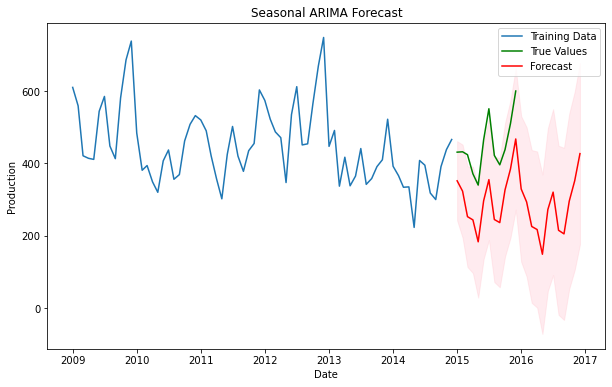

,upper sum of machines installed
2015-01-01,461.246359
2015-02-01,451.763526
2015-03-01,391.841139
2015-04-01,390.863728
2015-05-01,337.329217
2015-06-01,457.273800
2015-07-01,521.946871
2015-08-01,417.727822
2015-09-01,414.929905
2015-10-01,511.096893


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 3: Load and preprocess the data
data_path = "C://Users/ss/Downloads/arima.xlsx"  # Replace with your file path
df = pd.read_excel(data_path)
df['Date'] = pd.to_datetime(df['Month-Year'])  # Convert the 'Date' column to datetime type
df.set_index('Date', inplace=True)  # Set 'Date' as the index

# Assuming the production data is in a column named 'Production', replace it with the actual column name if different
production_series = df['sum of machines installed']

# If the data is not already in monthly frequency, you can resample it as follows:
# production_series = production_series.resample('M').sum()

# Split data into training and testing sets
train_data = production_series.iloc[:-12]  # Keep the last 12 months as test set
test_data = production_series.iloc[-12:]
# Step 4: Fit the Seasonal ARIMA model and make predictions
order = (1, 1, 1)        # (p, d, q) - Non-seasonal order
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, S) - Seasonal order

model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
result = model.fit()

# Forecast using the fitted model
forecast = result.get_forecast(steps=2*len(test_data))
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()
# Step 5: Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='True Values', color='g')
plt.plot(forecast_mean, label='Forecast', color='r')
plt.fill_between(forecast_conf_int.index, forecast_conf_int['lower sum of machines installed'], forecast_conf_int['upper sum of machines installed'], color='pink', alpha=0.3)
plt.legend()
plt.title('Seasonal ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Production')
plt.show()
forecast_conf_int['average_sum of machines installed']=(forecast_conf_int['lower sum of machines installed']+forecast_conf_int['upper sum of machines installed'])/2
forecast_conf_int=forecast_conf_int[['upper sum of machines installed']]
forecast_conf_int

In [34]:
forecast_conf_int1=forecast_conf_int.copy()

In [32]:
forecast_conf_int

,lower Sum of Total New Policies,upper Sum of Total New Policies
2015-01-01,329.058766,1872.650606
2015-02-01,43.870420,1901.651131
2015-03-01,-394.424258,1655.011403
2015-04-01,-558.755614,1644.377972
2015-05-01,-874.023513,1466.223005
2015-06-01,-366.517527,2101.185946
2015-07-01,-301.226167,2287.019428
2015-08-01,-792.201874,1911.033015
2015-09-01,-897.934373,1915.600209
2015-10-01,-567.774120,2352.066275


In [30]:
forecast_conf_int2=forecast_conf_int.copy()

In [37]:

df1=pd.concat([forecast_conf_int2,forecast_conf_int1], axis=1)
df1['Average premium per policy']=5500
df1

,upper Sum of Total New Policies,upper sum of machines installed,Average premium per policy
2015-01-01,1872.650606,461.246359,5500
2015-02-01,1901.651131,451.763526,5500
2015-03-01,1655.011403,391.841139,5500
2015-04-01,1644.377972,390.863728,5500
2015-05-01,1466.223005,337.329217,5500
2015-06-01,2101.185946,457.273800,5500
2015-07-01,2287.019428,521.946871,5500
2015-08-01,1911.033015,417.727822,5500
2015-09-01,1915.600209,414.929905,5500
2015-10-01,2352.066275,511.096893,5500


In [38]:
df1['Number of policies per machine']=df1['upper Sum of Total New Policies']/df1['upper sum of machines installed']
df1['Monthly Business']=df1['upper sum of machines installed']*df1['Average premium per policy']*df1['Number of policies per machine']/1000000
df1

,upper Sum of Total New Policies,upper sum of machines installed,Average premium per policy,Number of policies per machine,Monthly Business
2015-01-01,1872.650606,461.246359,5500,4.059979,10.299578
2015-02-01,1901.651131,451.763526,5500,4.209395,10.459081
2015-03-01,1655.011403,391.841139,5500,4.223680,9.102563
2015-04-01,1644.377972,390.863728,5500,4.207037,9.044079
2015-05-01,1466.223005,337.329217,5500,4.346564,8.064227
2015-06-01,2101.185946,457.273800,5500,4.595028,11.556523
2015-07-01,2287.019428,521.946871,5500,4.381709,12.578607
2015-08-01,1911.033015,417.727822,5500,4.574828,10.510682
2015-09-01,1915.600209,414.929905,5500,4.616684,10.535801
2015-10-01,2352.066275,511.096893,5500,4.601997,12.936365


In [39]:
df1.to_clipboard()

In [6]:
train_data

,Month-Year,sum of machines installed,Sum of Total New Policies,Number of policies per machine,year,Average premium per policy,Monthly Business
0,2009-01-01,610,2069,3.391803,2009,22990,47566310.0
1,2009-02-01,559,1908,3.413238,2009,22990,43864920.0
2,2009-03-01,421,1372,3.258907,2009,22990,31542280.0
3,2009-04-01,414,1321,3.190821,2009,22990,30369790.0
4,2009-05-01,411,1345,3.272506,2009,22990,30921550.0
...,...,...,...,...,...,...,...
79,2015-08-01,422,865,2.049763,2015,51347,44415155.0
80,2015-09-01,396,710,1.792929,2015,51347,36456370.0
81,2015-10-01,438,657,1.500000,2015,51347,33734979.0
82,2015-11-01,510,493,0.966667,2015,51347,25314071.0


In [3]:
test_data


2023-12-02   -5.231870
2023-12-03   -6.438333
2023-12-04   -5.278274
2023-12-05   -3.656431
2023-12-06   -5.455205
2023-12-07   -5.816377
2023-12-08   -3.527505
2023-12-09   -3.366701
2023-12-10   -4.711132
2023-12-11   -4.478838
2023-12-12   -2.911129
2023-12-13   -6.108865
2023-12-14   -5.864140
2023-12-15   -4.321713
2023-12-16   -3.146476
2023-12-17   -1.931718
2023-12-18    0.563985
2023-12-19   -0.503896
2023-12-20   -2.370922
2023-12-21   -1.920300
2023-12-22   -3.717990
2023-12-23   -1.580114
2023-12-24   -1.950105
2023-12-25   -0.556643
2023-12-26   -2.685479
2023-12-27    0.179045
2023-12-28    2.377454
2023-12-29   -0.733717
2023-12-30    0.459207
2023-12-31    1.208154
Freq: D, dtype: float64